## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, MobileNetV2
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/MyDrive/datasets_itmo/task5/train'
val =   '/content/drive/MyDrive/datasets_itmo/task5/val'
test =  '/content/drive/MyDrive/datasets_itmo/task5/test'

task4  = '/content/drive/MyDrive/datasets_itmo/task5/task4'

# The shape of the RGB image
img_width, img_height, channels = 64, 64, 3

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = len(os.listdir(train+'/dogs'))
# validation set size
nb_validation_samples = len(os.listdir(val+'/dogs'))
# test set size
nb_test_samples = len(os.listdir(test+'/dogs'))

nb_task4_samples = len(os.listdir(task4+'/dogs'))

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

task4_generator = datagen.flow_from_directory(
    task4,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2510 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [5]:
model = Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(16, kernel_size=(3, 3), activation="relu"),              # 1) A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
        MaxPooling2D(pool_size=(2, 2)),                                 # 2) MaxPooling layer with filter size 2x2
        Conv2D(32, kernel_size=(3, 3), activation="relu"),              # 3) A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
        MaxPooling2D(pool_size=(2, 2)),                                 # 4) MaxPooling layer with filter size 2x2
        Conv2D(64, kernel_size=(3, 3), activation="relu"),              # 5) A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
        MaxPooling2D(pool_size=(2, 2)),                                 # 6) MaxPooling layer with filter size 2x2
        Flatten(),                                                      # 7) Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps
        Dense(64, activation="relu"),                                   # 8) A fully connected layer with 64 neurons. Activation function - 'relu'
        Dropout(0.5),                                                   # 9) Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting
        Dense(1, activation="sigmoid"),
    ]
)

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-30-f790ba523922>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 77.14%


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

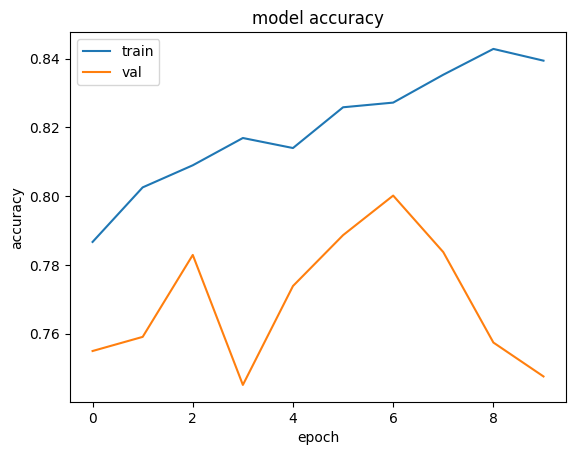

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

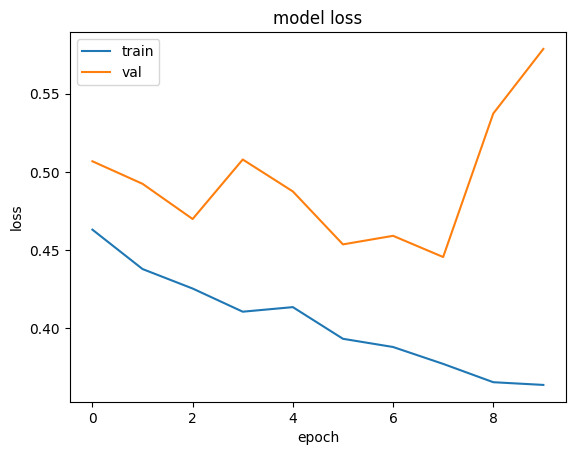

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
history_15 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

In [ ]:
scores = model.evaluate_generator(task4_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-45-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 77.96%


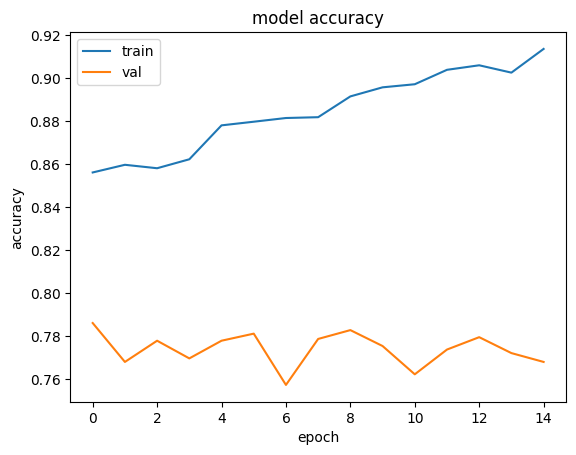

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

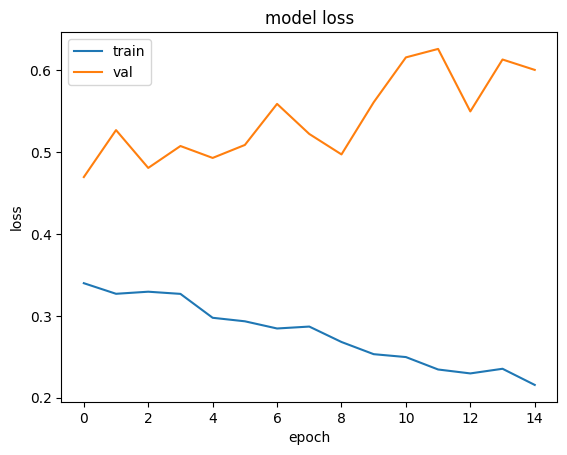

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
history3 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-46-afcbfc1d13ae>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model.fit_generator(


Epoch 1/20
156/156 [==============================] - 30s 188ms/step - loss: 0.2072 - accuracy: 0.9178 - val_loss: 0.6265 - val_accuracy: 0.7870
Epoch 2/20
156/156 [==============================] - 31s 200ms/step - loss: 0.2037 - accuracy: 0.9189 - val_loss: 0.6842 - val_accuracy: 0.7640
Epoch 3/20
156/156 [==============================] - 32s 202ms/step - loss: 0.1969 - accuracy: 0.9226 - val_loss: 0.6440 - val_accuracy: 0.7508
Epoch 4/20
156/156 [==============================] - 31s 198ms/step - loss: 0.1856 - accuracy: 0.9244 - val_loss: 0.6683 - val_accuracy: 0.7747
Epoch 5/20
156/156 [==============================] - 30s 196ms/step - loss: 0.1778 - accuracy: 0.9336 - val_loss: 0.7222 - val_accuracy: 0.7771
Epoch 6/20
156/156 [==============================] - 29s 183ms/step - loss: 0.1728 - accuracy: 0.9349 - val_loss: 0.6547 - val_accuracy: 0.7936
Epoch 7/20
156/156 [==============================] - 34s 218ms/step - loss: 0.1610 - accuracy: 0.9349 - val_loss: 0.7067 - val_ac

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-47-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 76.64%


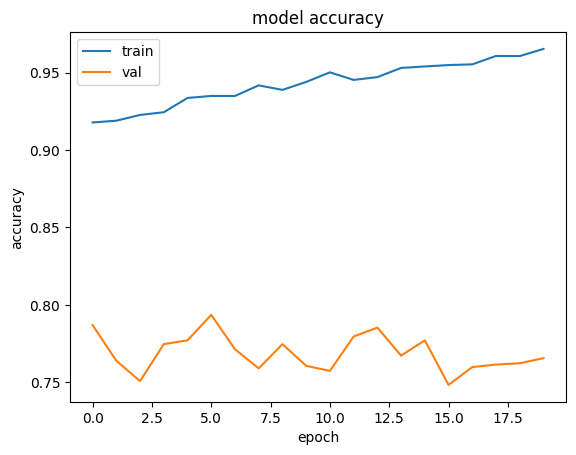

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

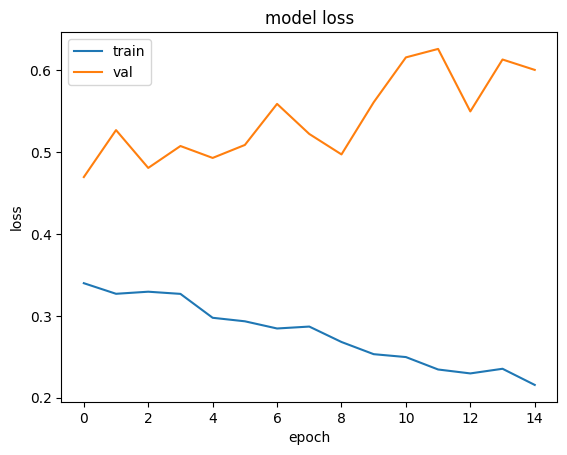

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

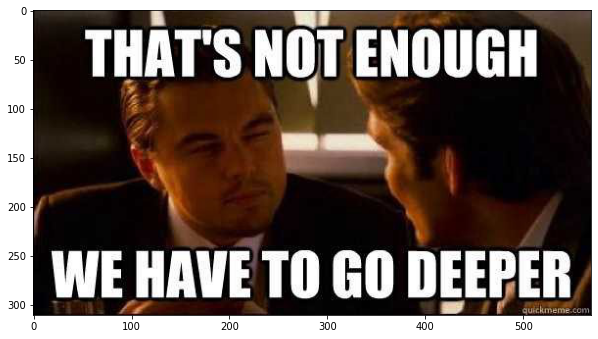

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [5]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

base_model = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(64, 64, 3))
base_model.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

base_model.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [6]:
# add layers to VGG16:
inputs = keras.Input(shape=(64, 64, 3))
x = base_model(inputs, training=False)
x = Flatten()(x)                            # + flattening
x = Dense(256, activation="relu")(x)        # + Dense fullyconnected layer with 256 neurons + ReLu
x = Dropout(0.5)(x)                         # + Dropout
outputs = Dense(1, activation="sigmoid")(x) # + Dense layer with 1 neuron + sigmoid
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 15239489 (58.13 MB)
Trainable params: 524801 (2

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [9]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history_VGG16 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-9-36101f30f65f>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_VGG16 = model.fit_generator(


Epoch 1/10
156/156 [==============================] - 948s 6s/step - loss: 0.4874 - accuracy: 0.7600 - val_loss: 0.4597 - val_accuracy: 0.7656
Epoch 2/10
156/156 [==============================] - 484s 3s/step - loss: 0.4501 - accuracy: 0.7810 - val_loss: 0.4437 - val_accuracy: 0.7878
Epoch 3/10
156/156 [==============================] - 248s 2s/step - loss: 0.4323 - accuracy: 0.7933 - val_loss: 0.4210 - val_accuracy: 0.7952
Epoch 4/10
156/156 [==============================] - 149s 958ms/step - loss: 0.4128 - accuracy: 0.8070 - val_loss: 0.4109 - val_accuracy: 0.8059
Epoch 5/10
156/156 [==============================] - 89s 572ms/step - loss: 0.4012 - accuracy: 0.8140 - val_loss: 0.3973 - val_accuracy: 0.8191
Epoch 6/10
156/156 [==============================] - 60s 384ms/step - loss: 0.3906 - accuracy: 0.8191 - val_loss: 0.4195 - val_accuracy: 0.7969
Epoch 7/10
156/156 [==============================] - 46s 293ms/step - loss: 0.3907 - accuracy: 0.8209 - val_loss: 0.3978 - val_accurac

In [10]:
scores = model.evaluate_generator(task4_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-10-3ad33aac3a32>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(task4_generator, nb_test_samples // batch_size)


Accuracy on test data: 77.50%


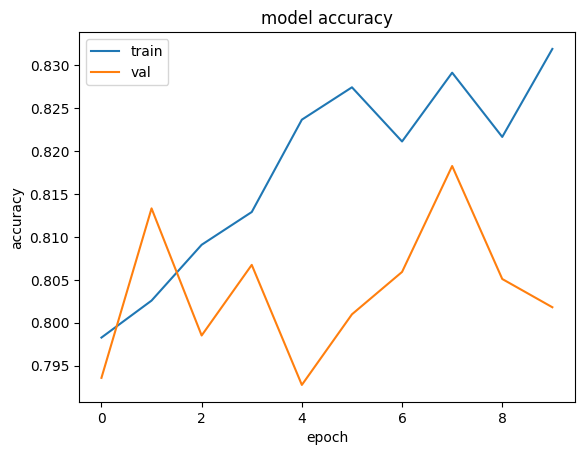

In [ ]:
#plt.figure(figsize=(10, 7), dpi=300)
plt.plot(history_VGG16.history['accuracy'])
plt.plot(history_VGG16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

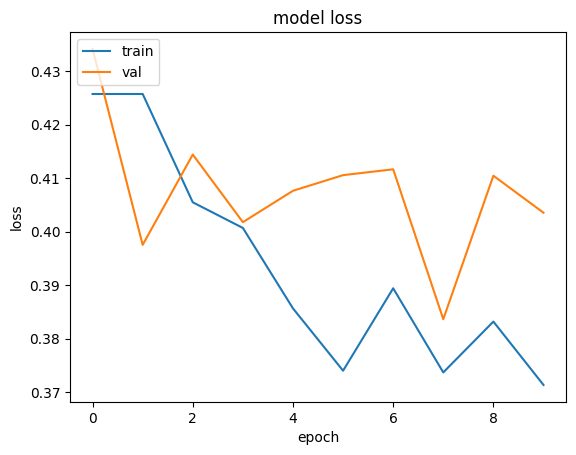

In [ ]:
#plt.figure(figsize=(10, 7), dpi=300)
plt.plot(history_VGG16.history['loss'])
plt.plot(history_VGG16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
history_VGG16 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-61-72b1272912eb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_VGG16 = model.fit_generator(


Epoch 1/10
156/156 [==============================] - 32s 203ms/step - loss: 0.5318 - accuracy: 0.7308 - val_loss: 0.5363 - val_accuracy: 0.7303
Epoch 2/10
156/156 [==============================] - 29s 186ms/step - loss: 0.5224 - accuracy: 0.7404 - val_loss: 0.5411 - val_accuracy: 0.7294
Epoch 3/10
156/156 [==============================] - 34s 220ms/step - loss: 0.5175 - accuracy: 0.7432 - val_loss: 0.5047 - val_accuracy: 0.7500
Epoch 4/10
156/156 [==============================] - 30s 190ms/step - loss: 0.5140 - accuracy: 0.7391 - val_loss: 0.5342 - val_accuracy: 0.7344
Epoch 5/10
156/156 [==============================] - 35s 223ms/step - loss: 0.5113 - accuracy: 0.7417 - val_loss: 0.5169 - val_accuracy: 0.7516
Epoch 6/10
156/156 [==============================] - 30s 190ms/step - loss: 0.5045 - accuracy: 0.7503 - val_loss: 0.5088 - val_accuracy: 0.7410
Epoch 7/10
156/156 [==============================] - 30s 192ms/step - loss: 0.5104 - accuracy: 0.7459 - val_loss: 0.5258 - val_ac

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-62-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 73.85%


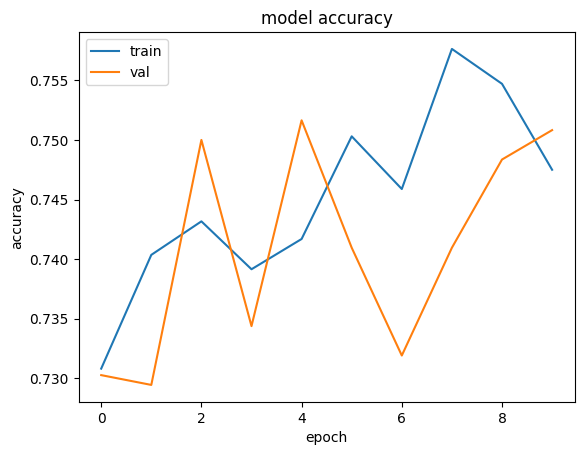

In [ ]:
plt.plot(history_VGG16.history['accuracy'])
plt.plot(history_VGG16.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

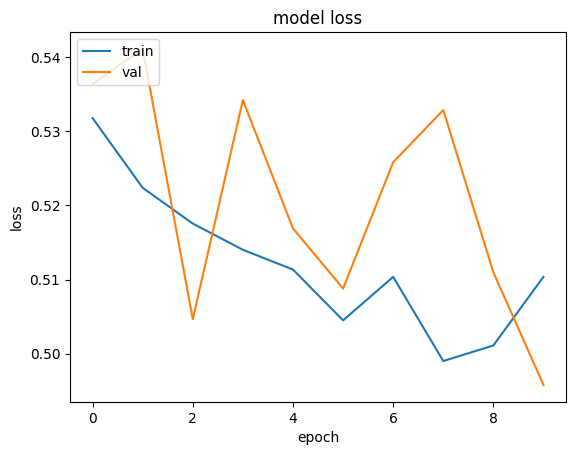

In [ ]:
plt.plot(history_VGG16.history['loss'])
plt.plot(history_VGG16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
history_VGG16 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15


<ipython-input-65-3e25f5744cd2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_VGG16 = model.fit_generator(


156/156 [==============================] - 31s 199ms/step - loss: 0.5063 - accuracy: 0.7473 - val_loss: 0.5109 - val_accuracy: 0.7377
Epoch 2/15
156/156 [==============================] - 31s 200ms/step - loss: 0.4995 - accuracy: 0.7556 - val_loss: 0.5060 - val_accuracy: 0.7582
Epoch 3/15
156/156 [==============================] - 29s 187ms/step - loss: 0.4972 - accuracy: 0.7534 - val_loss: 0.5073 - val_accuracy: 0.7566
Epoch 4/15
156/156 [==============================] - 31s 199ms/step - loss: 0.4905 - accuracy: 0.7582 - val_loss: 0.5157 - val_accuracy: 0.7442
Epoch 5/15
156/156 [==============================] - 32s 203ms/step - loss: 0.4835 - accuracy: 0.7653 - val_loss: 0.5148 - val_accuracy: 0.7541
Epoch 6/15
156/156 [==============================] - 30s 192ms/step - loss: 0.4819 - accuracy: 0.7608 - val_loss: 0.5398 - val_accuracy: 0.7262
Epoch 7/15
156/156 [==============================] - 29s 188ms/step - loss: 0.4781 - accuracy: 0.7686 - val_loss: 0.5373 - val_accuracy: 0.7

In [ ]:
base_model = MobileNetV2(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(64, 64, 3))
base_model.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 32, 32, 32)           864       ['input_12[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 32, 32, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [ ]:
# add layers to MobileNetV2:
inputs = keras.Input(shape=(64, 64, 3))
x = base_model(inputs, training=False)
x = Flatten()(x)                            # + flattening
x = Dense(256, activation="relu")(x)        # + Dense fullyconnected layer with 256 neurons + ReLu
x = Dropout(0.5)(x)                         # + Dropout
outputs = Dense(1, activation="sigmoid")(x) # + Dense layer with 1 neuron + sigmoid
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_8 (Flatten)         (None, 5120)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               1310976   
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                           

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [ ]:
history_MobileNetV2 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

<ipython-input-50-6db936f95aba>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_MobileNetV2 = model.fit_generator(


Epoch 1/10
156/156 [==============================] - 36s 197ms/step - loss: 0.5417 - accuracy: 0.7671 - val_loss: 0.3910 - val_accuracy: 0.8100
Epoch 2/10
156/156 [==============================] - 31s 198ms/step - loss: 0.3961 - accuracy: 0.8173 - val_loss: 0.3918 - val_accuracy: 0.8141
Epoch 3/10
156/156 [==============================] - 34s 217ms/step - loss: 0.3763 - accuracy: 0.8242 - val_loss: 0.3801 - val_accuracy: 0.8174
Epoch 4/10
156/156 [==============================] - 31s 199ms/step - loss: 0.3530 - accuracy: 0.8410 - val_loss: 0.3867 - val_accuracy: 0.8191
Epoch 5/10
156/156 [==============================] - 31s 196ms/step - loss: 0.3504 - accuracy: 0.8405 - val_loss: 0.3724 - val_accuracy: 0.8232
Epoch 6/10
156/156 [==============================] - 40s 259ms/step - loss: 0.3326 - accuracy: 0.8492 - val_loss: 0.4053 - val_accuracy: 0.8257
Epoch 7/10
156/156 [==============================] - 31s 198ms/step - loss: 0.3173 - accuracy: 0.8581 - val_loss: 0.3775 - val_ac

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

<ipython-input-51-dca356712a64>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 84.29%


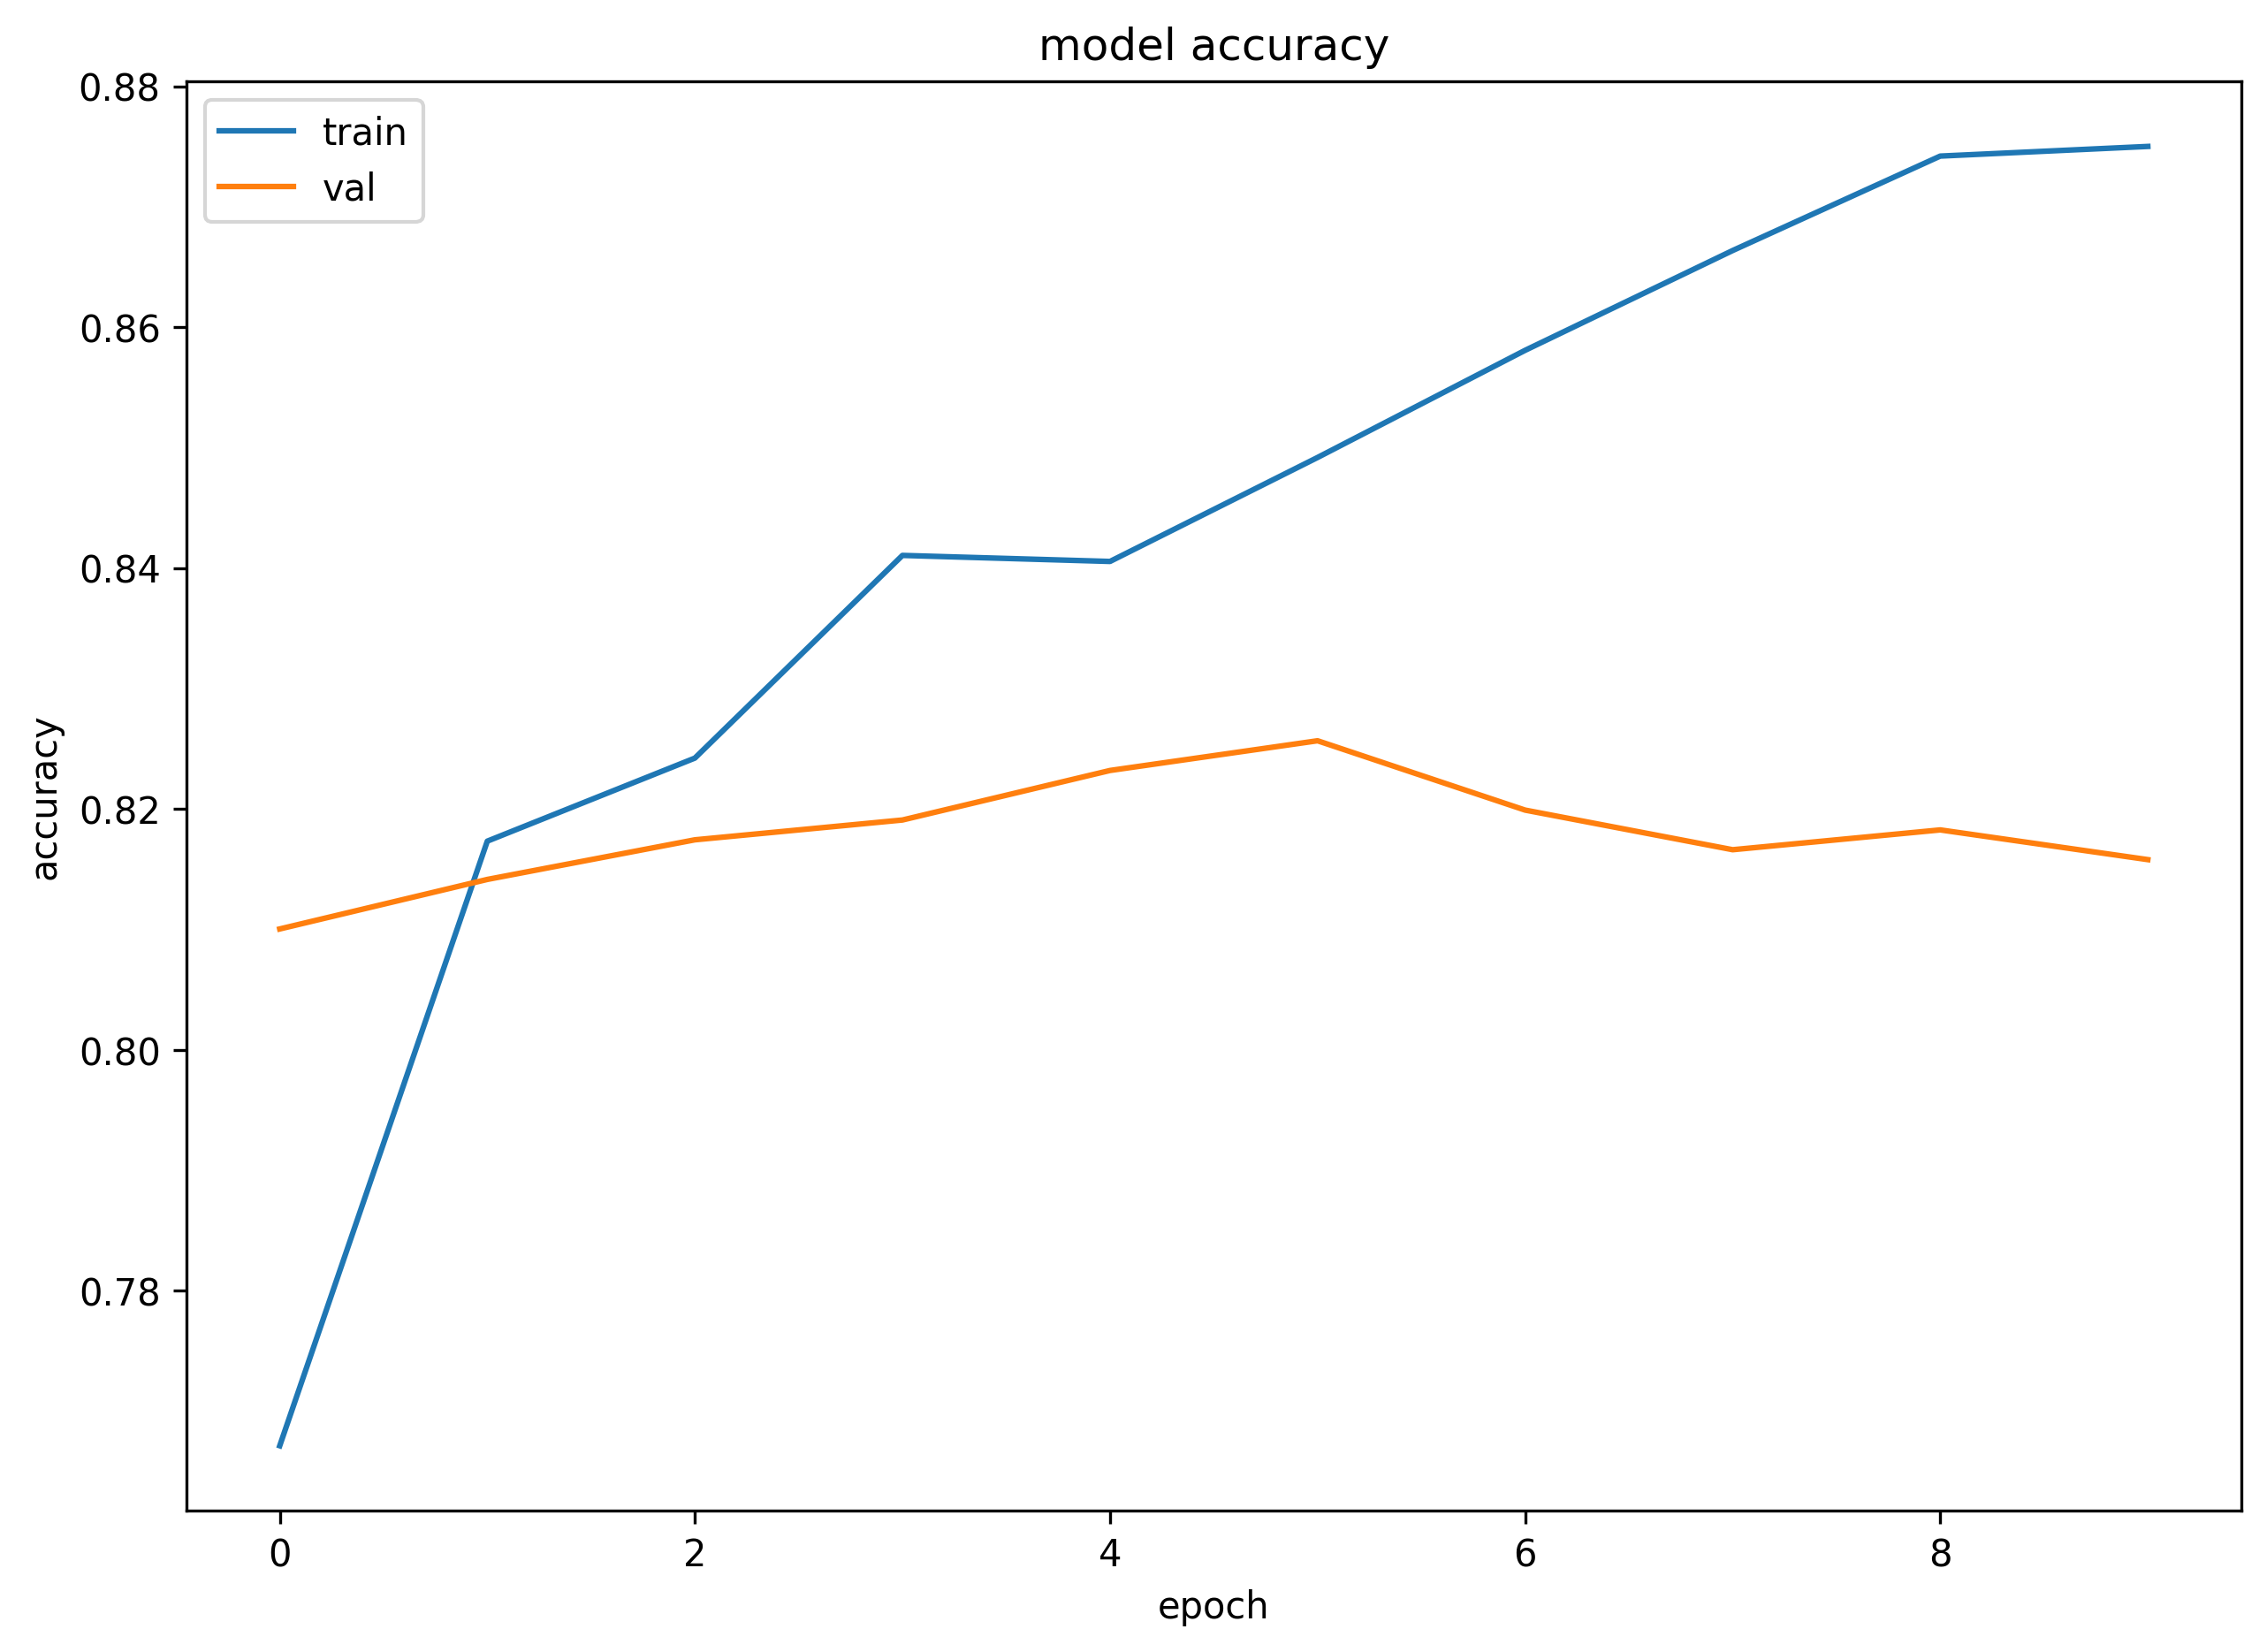

In [ ]:
plt.figure(figsize=(10, 7), dpi=300)
plt.plot(history_MobileNetV2.history['accuracy'])
plt.plot(history_MobileNetV2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

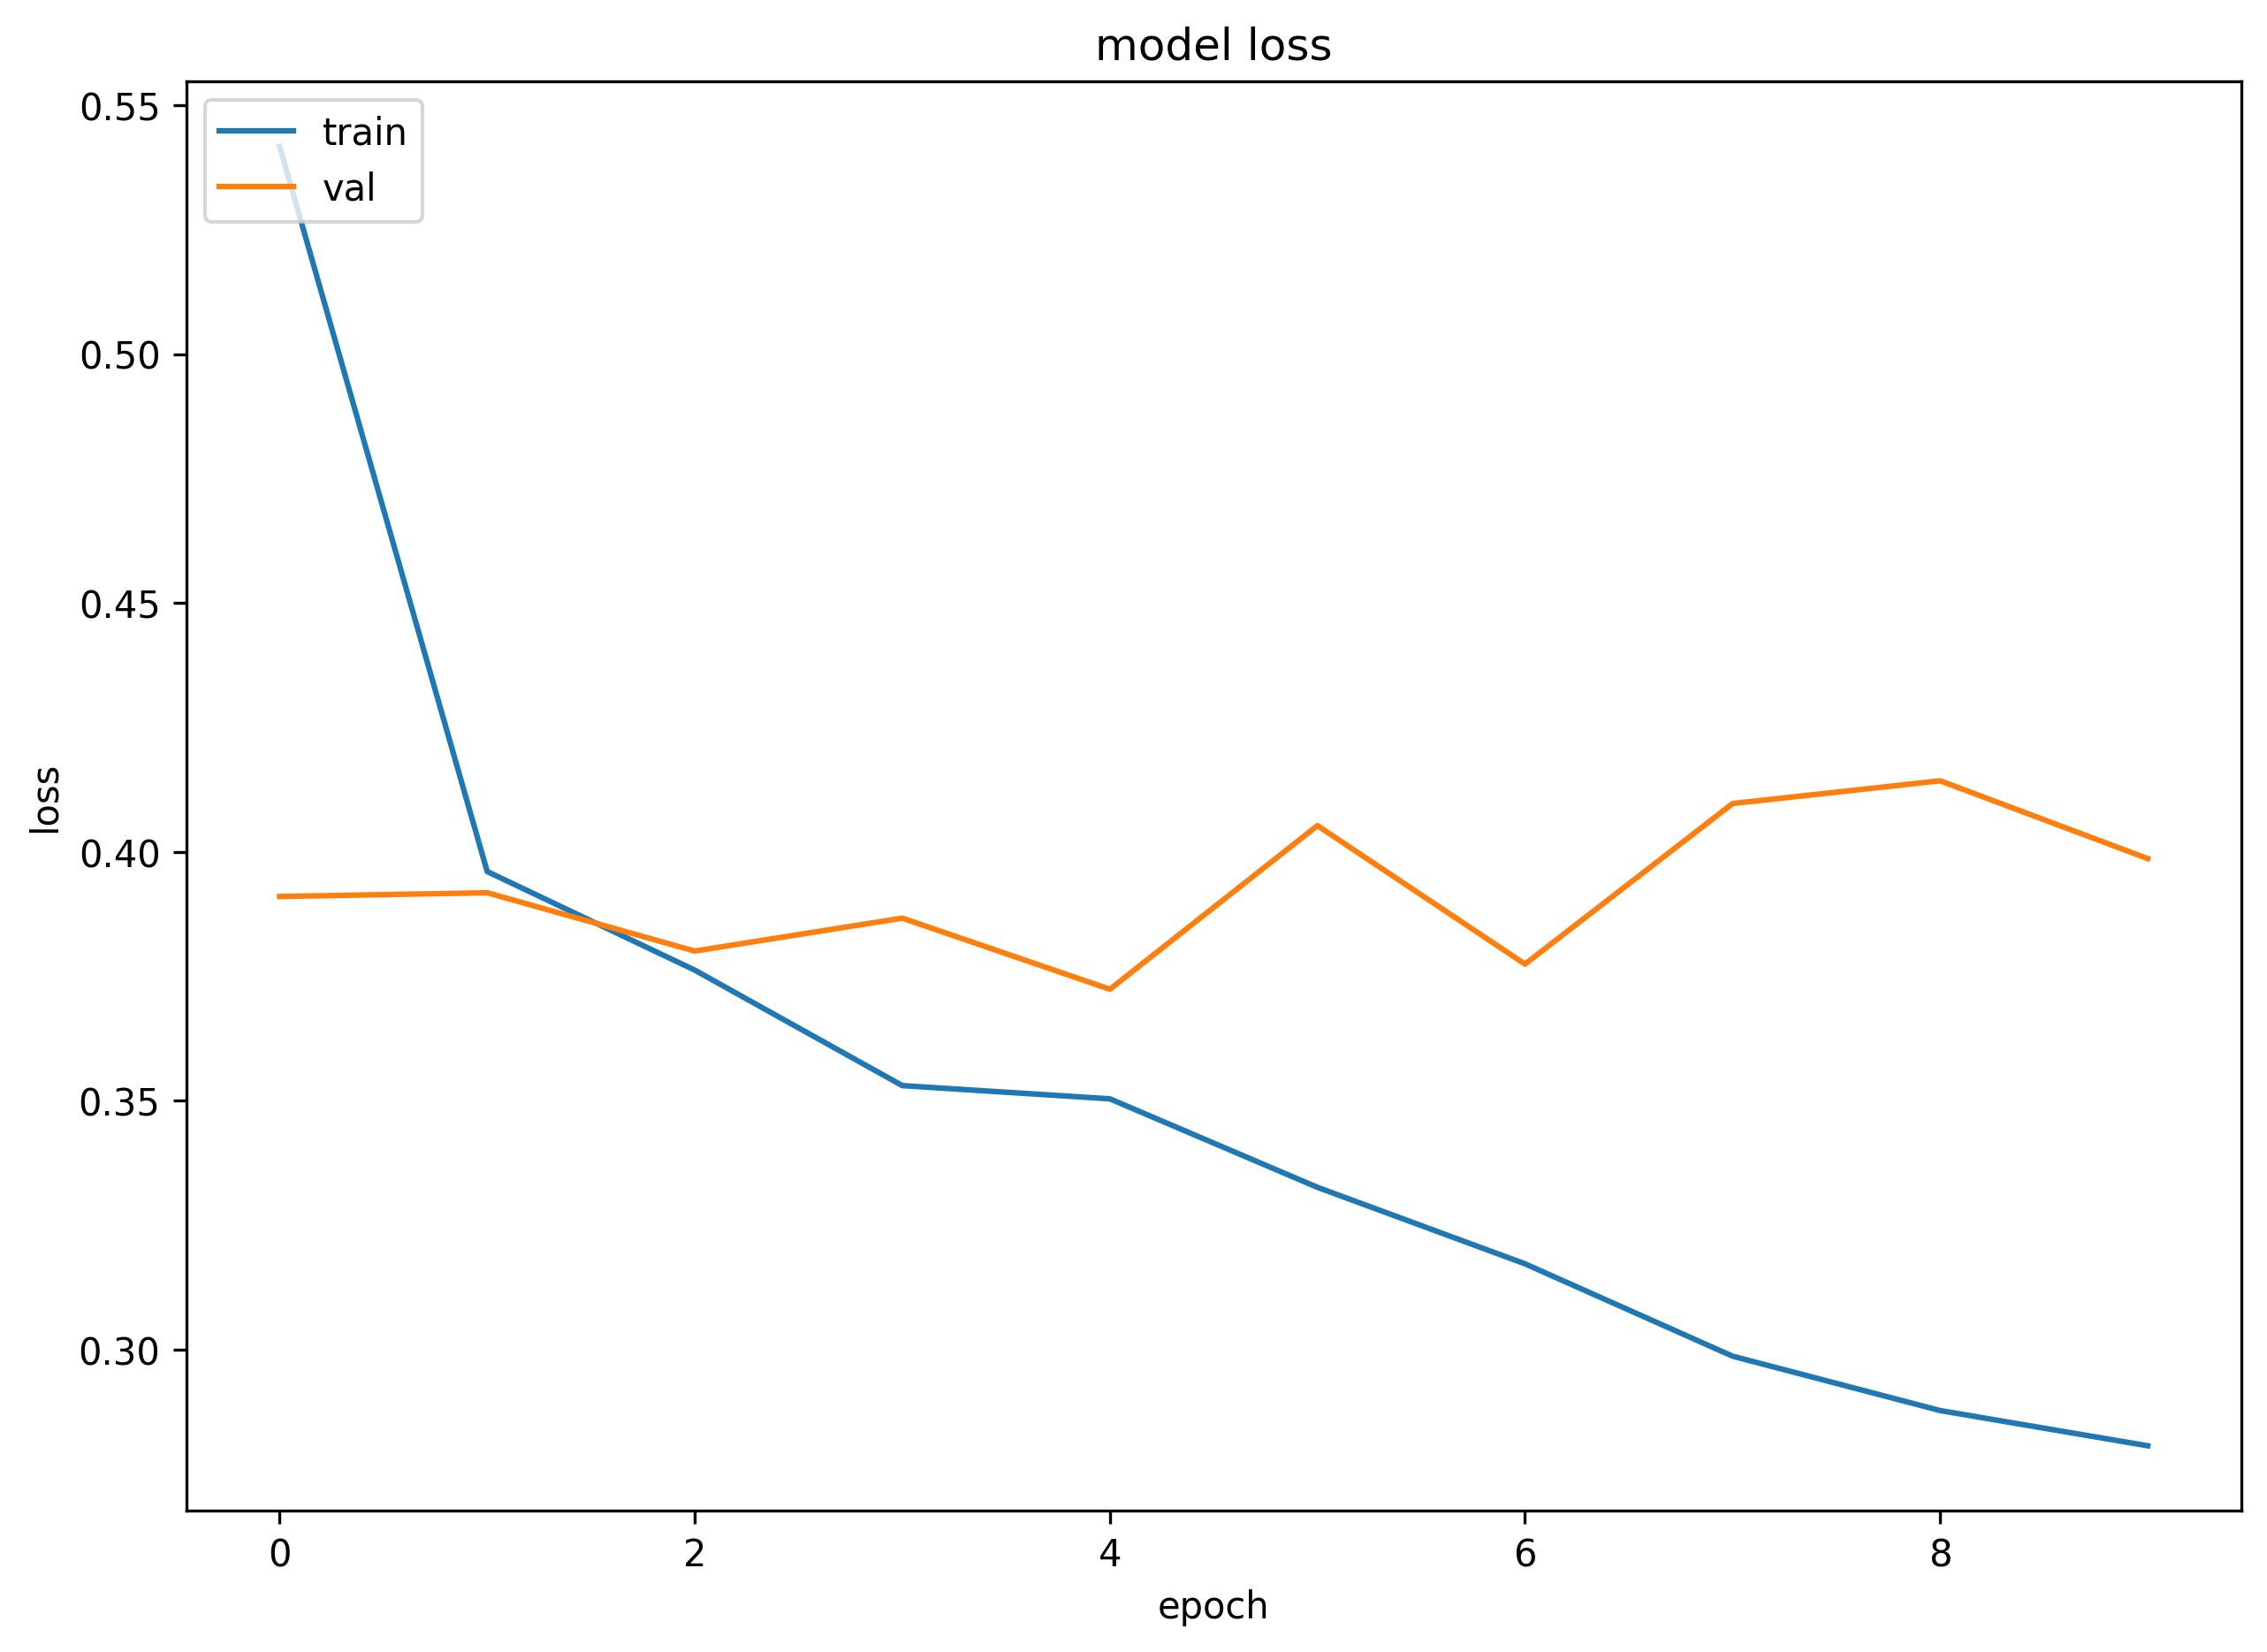

In [ ]:
plt.figure(figsize=(10, 7), dpi=300)
plt.plot(history_MobileNetV2.history['loss'])
plt.plot(history_MobileNetV2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def model(epochs):
  model = Sequential(
      [
          keras.Input(shape=input_shape),
          Conv2D(16, kernel_size=(3, 3), activation="relu"),              # 1) A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
          MaxPooling2D(pool_size=(2, 2)),                                 # 2) MaxPooling layer with filter size 2x2
          Conv2D(32, kernel_size=(3, 3), activation="relu"),              # 3) A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
          MaxPooling2D(pool_size=(2, 2)),                                 # 4) MaxPooling layer with filter size 2x2
          Conv2D(64, kernel_size=(3, 3), activation="relu"),              # 5) A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
          MaxPooling2D(pool_size=(2, 2)),                                 # 6) MaxPooling layer with filter size 2x2
          Flatten(),                                                      # 7) Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps
          Dense(64, activation="relu"),                                   # 8) A fully connected layer with 64 neurons. Activation function - 'relu'
          Dropout(0.5),                                                   # 9) Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting
          Dense(1, activation="sigmoid"),
      ]
  )


  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  history = model.fit_generator(
      train_generator,
      steps_per_epoch=nb_train_samples // batch_size,
      epochs=epochs, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
      validation_data=val_generator,
      validation_steps=nb_validation_samples // batch_size)
  return model

In [ ]:
def vgg16(epochs):

  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
  base_model.trainable = False

  inputs = keras.Input(shape=(64, 64, 3))
  x = base_model(inputs, training=False)
  x = Flatten()(x)                            # + flattening
  x = Dense(256, activation="relu")(x)        # + Dense fullyconnected layer with 256 neurons + ReLu
  x = Dropout(0.5)(x)                         # + Dropout
  outputs = Dense(1, activation="sigmoid")(x) # + Dense layer with 1 neuron + sigmoid
  model = keras.Model(inputs, outputs)

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-5), metrics=['accuracy'])

  history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

  return model

In [ ]:
def mobilenetv2(epochs):

  base_model = mobilenetv2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
  base_model.trainable = False

  inputs = keras.Input(shape=(64, 64, 3))
  x = base_model(inputs, training=False)
  x = Flatten()(x)                            # + flattening
  x = Dense(256, activation="relu")(x)        # + Dense fullyconnected layer with 256 neurons + ReLu
  x = Dropout(0.5)(x)                         # + Dropout
  outputs = Dense(1, activation="sigmoid")(x) # + Dense layer with 1 neuron + sigmoid
  model = keras.Model(inputs, outputs)

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-5), metrics=['accuracy'])

  history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

  return model

In [ ]:
f_lst = [model, vgg16, mobilenetv2]
epochs = [10, 15, 20]
acc = []

In [ ]:
def best_f(f_lst):
  for i in range(len(f_lst)):
    for j in (epochs):
      mdl = f_lst[i](j)
      scores = mdl.evaluate_generator(test_generator, nb_test_samples // batch_size)

      acc.append([str(f_lst[i]), scores, j]) # [name, accuracy, epoch]
  return acc